* Code of https://qiita.com/Gin04qt/items/9f9a55b5516af4576630

In [2]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import chainer
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions
from PIL import Image

In [7]:
gpu = -1
image_path = './data/pug.jpg'

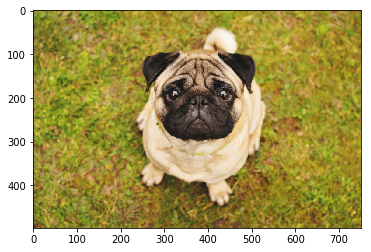

In [8]:
img = Image.open(image_path)
plt.imshow(img)
plt.show()

* transfer learning (vgg16)

In [5]:
vgg16 = chainer.links.VGG16Layers()

Now loading caffemodel (usually it may take few minutes)


In [9]:
img = Image.open(image_path)
x = chainer.links.model.vision.vgg.prepare(img)
x = x[np.newaxis] # batch size
result = vgg16(x)
F.argmax(F.softmax(result['prob'], axis=1), axis=1)

variable([254])

In [10]:
vgg16.available_layers

['conv1_1',
 'conv1_2',
 'pool1',
 'conv2_1',
 'conv2_2',
 'pool2',
 'conv3_1',
 'conv3_2',
 'conv3_3',
 'pool3',
 'conv4_1',
 'conv4_2',
 'conv4_3',
 'pool4',
 'conv5_1',
 'conv5_2',
 'conv5_3',
 'pool5',
 'fc6',
 'fc7',
 'fc8',
 'prob']

In [11]:
img = Image.open(image_path)
x = chainer.links.model.vision.vgg.prepare(img)
x = x[np.newaxis]
result = vgg16(x, layers=['fc7'])
result['fc7'].data.squeeze().shape

(4096,)

In [12]:
img = Image.open(image_path)
x = chainer.links.model.vision.vgg.prepare(img)
x = x[np.newaxis]
result = vgg16.extract(x)
result['fc7'].data.squeeze().shape

(4096,)

In [13]:
img = Image.open(image_path)
img = [img] # batch size
result = vgg16.extract(img)
result['fc7'].data.squeeze().shape

(4096,)

* transfer learning (resnet152)

In [14]:
resnet152 = chainer.links.ResNet152Layers()

In [16]:
img = Image.open(image_path)
x = chainer.links.model.vision.resnet.prepare(img)
x = x[np.newaxis]
result = resnet152(x)
F.argmax(F.softmax(result['prob'], axis=1), axis=1)

/usr/local/lib/python3.6/dist-packages/chainer/functions/normalization/batch_normalization.py:67: UserWarning: A batch with no more than one sample has been given to F.batch_normalization. F.batch_normalization will always output a zero tensor for such batches. This could be caused by incorrect configuration in your code (such as running evaluation while chainer.config.train=True), but could also happen in the last batch of training if non-repeating iterator is used.
  UserWarning)


variable([254])

In [17]:
resnet152.available_layers

['conv1', 'pool1', 'res2', 'res3', 'res4', 'res5', 'pool5', 'fc6', 'prob']

In [18]:
img = Image.open(image_path)
x = chainer.links.model.vision.resnet.prepare(img)
x = x[np.newaxis]
result = resnet152(x, layers=['pool5'])
result['pool5'].data.squeeze().shape

/usr/local/lib/python3.6/dist-packages/chainer/functions/normalization/batch_normalization.py:67: UserWarning: A batch with no more than one sample has been given to F.batch_normalization. F.batch_normalization will always output a zero tensor for such batches. This could be caused by incorrect configuration in your code (such as running evaluation while chainer.config.train=True), but could also happen in the last batch of training if non-repeating iterator is used.
  UserWarning)


(2048,)

In [19]:
img = Image.open(image_path)
x = chainer.links.model.vision.resnet.prepare(img)
x = x[np.newaxis]
result = resnet152.extract(x)
result['pool5'].data.squeeze().shape

/usr/local/lib/python3.6/dist-packages/chainer/functions/normalization/batch_normalization.py:67: UserWarning: A batch with no more than one sample has been given to F.batch_normalization. F.batch_normalization will always output a zero tensor for such batches. This could be caused by incorrect configuration in your code (such as running evaluation while chainer.config.train=True), but could also happen in the last batch of training if non-repeating iterator is used.
  UserWarning)


(2048,)

In [20]:
img = Image.open(image_path)
img = [img]
result = resnet152.extract(img)
result['pool5'].data.squeeze().shape

/usr/local/lib/python3.6/dist-packages/chainer/functions/normalization/batch_normalization.py:67: UserWarning: A batch with no more than one sample has been given to F.batch_normalization. F.batch_normalization will always output a zero tensor for such batches. This could be caused by incorrect configuration in your code (such as running evaluation while chainer.config.train=True), but could also happen in the last batch of training if non-repeating iterator is used.
  UserWarning)


(2048,)

* transfer learning (googlenet)

In [21]:
googlenet = chainer.links.GoogLeNet()

Now loading caffemodel (usually it may take few minutes)


In [22]:
img = Image.open(image_path)
x = chainer.links.model.vision.googlenet.prepare(img)
x = x[np.newaxis]
result = googlenet(x)
F.argmax(F.softmax(result['prob'], axis=1), axis=1)

variable([254])

In [23]:
googlenet.available_layers

['conv1',
 'pool1',
 'conv2_reduce',
 'conv2',
 'pool2',
 'inception_3a',
 'inception_3b',
 'pool3',
 'inception_4a',
 'inception_4b',
 'inception_4c',
 'inception_4d',
 'inception_4e',
 'pool4',
 'inception_5a',
 'inception_5b',
 'pool5',
 'loss3_fc',
 'prob',
 'loss1_fc2',
 'loss2_fc2']

In [24]:
img = Image.open(image_path)
x = chainer.links.model.vision.googlenet.prepare(img)
x = x[np.newaxis]
result = googlenet(x, layers=['pool5'])
result['pool5'].data.squeeze().shape

(1024,)

In [25]:
img = Image.open(image_path)
x = chainer.links.model.vision.googlenet.prepare(img)
x = x[np.newaxis]
result = googlenet.extract(x)
result['pool5'].data.squeeze().shape

(1024,)

In [26]:
img = Image.open(image_path)
img = [img]
result = googlenet.extract(img)
result['pool5'].data.squeeze().shape

(1024,)

* finetuning (vgg16)

In [27]:
class VGG16Model(chainer.Chain):

    def __init__(self, out_size):
        super(VGG16Model, self).__init__(
            base = L.VGG16Layers(),
            fc = L.Linear(None, out_size)
        )

    def __call__(self, x):
        h = self.base(x, layers=['fc7'])
        y = self.fc(h['fc7'])
        return y

In [28]:
model = L.Classifier(VGG16Model(out_size=10))

img = Image.open(image_path)
x = chainer.links.model.vision.vgg.prepare(img)
x = x[np.newaxis]
model.predictor(x)

variable([[ 1.0664636 , -5.1863146 ,  4.1436048 ,  1.2037135 ,
            0.38277882, -0.9619386 , -2.087508  , -0.5334463 ,
           -2.3525748 ,  1.6452966 ]])

In [29]:
# 学習済みレイヤーの学習率を抑える    

model = L.Classifier(VGG16Model(out_size=10))
optimizer = chainer.optimizers.Adam(alpha=1e-4)
optimizer.setup(model)

for func_name in model.predictor.base._children:
    for param in model.predictor.base[func_name].params():
        param.update_rule.hyperparam.alpha *= 0.1

if gpu >= 0:
    chainer.cuda.get_device(gpu).use()
    model.to_gpu(gpu)

In [30]:
# 学習済みレイヤーの学習率を固定する

model = L.Classifier(VGG16Model(out_size=10))
optimizer = chainer.optimizers.Adam(alpha=1e-4)
optimizer.setup(model)

model.predictor.base.disable_update()

if gpu >= 0:
    chainer.cuda.get_device(gpu).use()
    model.to_gpu(gpu)

* finetuning (resnet152)

In [31]:
class ResNet152Model(chainer.Chain):

    def __init__(self, out_size):
        super(ResNet152Model, self).__init__(
            base = L.ResNet152Layers(),
            fc = L.Linear(None, out_size)
        )

    def __call__(self, x):
        h = self.base(x, layers=['pool5'])
        y = self.fc(h['pool5'])
        return y

In [32]:
model = L.Classifier(ResNet152Model(out_size=10))

img = Image.open(image_path)
x = chainer.links.model.vision.resnet.prepare(img)
x = x[np.newaxis]
model.predictor(x)

/usr/local/lib/python3.6/dist-packages/chainer/functions/normalization/batch_normalization.py:67: UserWarning: A batch with no more than one sample has been given to F.batch_normalization. F.batch_normalization will always output a zero tensor for such batches. This could be caused by incorrect configuration in your code (such as running evaluation while chainer.config.train=True), but could also happen in the last batch of training if non-repeating iterator is used.
  UserWarning)


variable([[-1.0452417 , -0.49114785,  0.3883165 ,  0.14580646,
           -0.18585327, -0.16432053,  0.35600108, -0.8057301 ,
           -0.15212363, -0.13119067]])

In [33]:
# 学習済みレイヤーの学習率を抑える    

model = L.Classifier(ResNet152Model(out_size=10))
optimizer = chainer.optimizers.Adam(alpha=1e-4)
optimizer.setup(model)

for func_name in model.predictor.base._children:
    for param in model.predictor.base[func_name].params():
        param.update_rule.hyperparam.alpha *= 0.1

if gpu >= 0:
    chainer.cuda.get_device(gpu).use()
    model.to_gpu(gpu)

In [34]:
# 学習済みレイヤーの学習率を固定する

model = L.Classifier(ResNet152Model(out_size=10))
optimizer = chainer.optimizers.Adam(alpha=1e-4)
optimizer.setup(model)

model.predictor.base.disable_update()

if gpu >= 0:
    chainer.cuda.get_device(gpu).use()
    model.to_gpu(gpu)

In [35]:
!python --version

Python 3.6.3


In [36]:
!pip freeze

absl-py==0.2.0
astor==0.6.2
backcall==0.1.0
bleach==1.5.0
certifi==2018.4.16
chainer==4.0.0
chardet==3.0.4
cntk-gpu==2.5.1
cupy==4.0.0
cycler==0.10.0
Cython==0.28.2
decorator==4.3.0
dm-sonnet==1.20
entrypoints==0.2.3
fastrlock==0.3
filelock==3.0.4
future==0.16.0
gast==0.2.0
graphviz==0.8.3
grpcio==1.11.0
h5py==2.7.1
html5lib==0.9999999
idna==2.6
ipykernel==4.8.2
ipython==6.3.1
ipython-genutils==0.2.0
ipywidgets==7.2.1
jedi==0.12.0
Jinja2==2.10
jsonschema==2.6.0
jupyter==1.0.0
jupyter-client==5.2.3
jupyter-console==5.2.0
jupyter-core==4.4.0
Keras==2.1.6
kiwisolver==1.0.1
Lasagne==0.2.dev1
leveldb==0.194
Mako==1.0.7
Markdown==2.6.11
MarkupSafe==1.0
matplotlib==2.2.2
mistune==0.8.3
mxnet-cu90==1.1.0.post0
nbconvert==5.3.1
nbformat==4.4.0
networkx==2.1
nose==1.3.7
notebook==5.4.1
numpy==1.14.3
pandas==0.22.0
pandocfilters==1.4.2
parso==0.2.0
pexpect==4.5.0
pickleshare==0.7.4
Pillow==5.1.0
prompt-toolkit==1.0.15
protobuf==3.5.2.post1
ptyprocess==0.5.2
pycurl==7.43.0
Pygments==2.2.0
pygobjec